In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("features_output.csv")

# Display the shape of the dataframe
print("Shape of the training dataset:", df.shape)

# Display the column names of the dataframe
print("\nColumns in the training dataset:\n", list(df.columns))
df.head()

Shape of the training dataset: (1050, 9)

Columns in the training dataset:
 ['file_name', 'num_points', 'num_flower_points', 'less_than_5_neighbors', 'more_than_5_neighbors', 'mean_closest_distance', 'std_closest_distance', 'std_count', 'label']


,file_name,num_points,num_flower_points,less_than_5_neighbors,more_than_5_neighbors,mean_closest_distance,std_closest_distance,std_count,label
0,Mouse0.xy,157,105,31,74,0.027662,0.010382,1.564495,Clean
1,stair.xy,160,75,22,53,0.013795,0.006745,1.283550,Clean
2,thing.xy,343,88,42,46,0.009741,0.005463,1.918673,Clean
3,vase.xy,317,91,56,35,0.010439,0.004041,1.113766,Clean
4,gt.xy,352,172,123,49,0.010331,0.000700,0.351355,Clean


In [17]:
label_counts = df['label'].value_counts()
print("\nCounts of each label:\n", label_counts)


Counts of each label:
 label
Distorted    515
Clean        279
Band         256
Name: count, dtype: int64


In [3]:
df.tail()

,file_name,num_points,num_flower_points,less_than_5_neighbors,more_than_5_neighbors,mean_closest_distance,std_closest_distance,std_count,label
1045,woodenspoonbinary1.xy,371,74,48,26,0.007888,0.000195,0.497653,Clean
1046,woodenspoonbinary1-0.005.xy,371,144,62,82,0.007251,0.003203,0.875326,Distorted
1047,woodenspoonbinary1-0.01.xy,371,201,49,152,0.009013,0.004629,1.255885,Distorted
1048,woodenspoonbinary1-0.015.xy,371,209,37,172,0.010326,0.005562,1.461289,Distorted
1049,woodenspoonbinary1-0.02.xy,371,216,29,187,0.011624,0.007106,1.978521,Distorted


In [4]:
df.describe()

,num_points,num_flower_points,less_than_5_neighbors,more_than_5_neighbors,mean_closest_distance,std_closest_distance,std_count
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2018.157143,1210.788571,184.119048,1026.669524,0.014827,0.006457,1.464849
std,9997.192848,6688.995893,815.524695,5875.802743,0.012217,0.006117,0.908346
min,32.000000,6.000000,4.000000,1.000000,0.000250,0.000170,0.200726
25%,168.000000,63.000000,23.000000,38.000000,0.006545,0.003062,0.899373
50%,314.000000,118.500000,38.500000,77.000000,0.013104,0.005115,1.257849
75%,868.000000,396.250000,94.000000,297.500000,0.020372,0.008633,1.895778
max,193354.000000,132481.000000,15440.000000,117041.000000,0.110476,0.047880,7.265748


In [6]:
X = df.drop(['label', 'file_name'], axis=1)
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape

((892, 7), (158, 7))

In [7]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['label'])


y_train = encoder.fit_transform(y_train)

y_test = encoder.transform(y_test)

In [9]:
y_train.head()

,num_points,num_flower_points,less_than_5_neighbors,more_than_5_neighbors,mean_closest_distance,std_closest_distance,std_count
649,1360,760,124,636,0.005577,0.003545,2.188203
528,976,499,112,387,0.007164,0.004110,1.693460
513,2519,1456,212,1244,0.004487,0.002919,2.483701
585,2744,1309,305,1004,0.003087,0.001860,1.890503
2,343,88,42,46,0.009741,0.005463,1.918673


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(10,80),
              'max_depth': randint(1,10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=15, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

c:\Users\KEERTHIHARAN\miniconda3\envs\denoising\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KEERTHIHARAN\miniconda3\envs\denoising\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KEERTHIHARAN\miniconda3\envs\denoising\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KEERTHIHARAN\miniconda3\envs\denoising\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228616B7DF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228616AAA90>})

In [11]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 52}


In [18]:
import pickle

# Save the best model
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

# Print confirmation
print("Model saved as 'best_random_forest_model.pkl'")

Model saved as 'best_random_forest_model.pkl'


In [12]:
y_pred = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)

print('Training set score: {:.4f}'.format(best_rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(best_rf.score(X_test, y_test)))

Training set score: 0.9552
Test set score: 0.9177


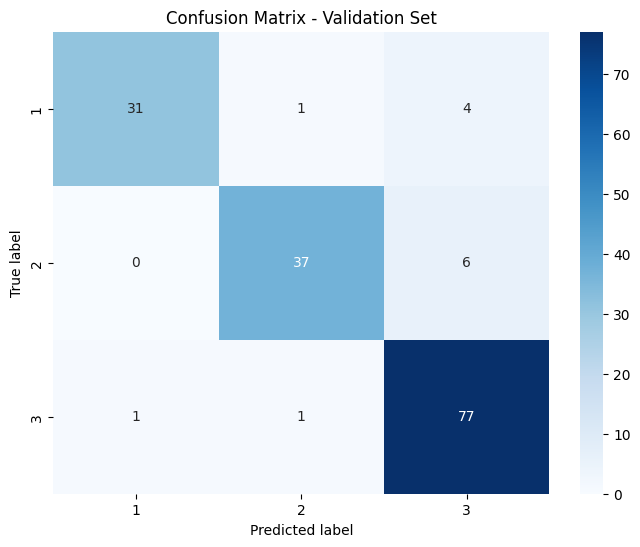

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# Set up the figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation Set')
plt.show()

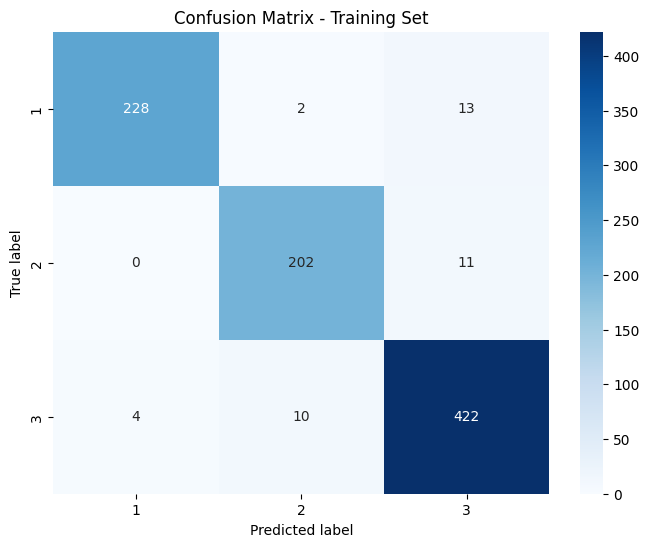

In [16]:
cm = confusion_matrix(y_train, y_pred_train)
# Set up the figure
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training Set')
plt.show()